## PCA on filtered DMS53 variant data
- filter dropkick scores
- filter out MT and ribosomal (RP) genes
- then run PCA and get loadings

In [1]:
import os
import sys
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import dropkick as dk
import cellrank as cr
import scanorama
from mazebox_filter import dropkick_filter, dropkick_recipe, doublet_detections

### Read Data

In [2]:
MTX_DIR = '/mnt/monica/quaranta2/Sequence_data_from_VANTAGE/CW-AW_data/processed_data_Qi_Liu'
sample_names = os.listdir(MTX_DIR)
sample_names.sort()
sample_names = sample_names[2:12]

In [3]:
# H841 - samples[0:5]
# DMS53 - samples[5:10]
cache = False
cache_compression = None
samples = []

for sample in sample_names[5:10]:
    print(sample)
    s = sc.read(
        f'{MTX_DIR}/{sample}/cm_sparse/{sample}_S1_L005_counts.mtx',
        cache=cache,
        cache_compression=cache_compression,
    ).T
    
    genes = pd.read_csv(f'{MTX_DIR}/{sample}/cm_sparse/{sample}_S1_L005_features.tsv', header=None, sep='\t')
    s.var_names = genes[0]
    # s.var['gene_symbols'] = genes[1].values
    s.obs_names = pd.read_csv(f'{MTX_DIR}/{sample}/cm_sparse/{sample}_S1_L005_barcodes.tsv', header=None)[0]
    print(s)
    samples.append(s)

8056-AW-0006
AnnData object with n_obs × n_vars = 12622 × 25828
8056-AW-0007
AnnData object with n_obs × n_vars = 13303 × 25856
8056-AW-0008
AnnData object with n_obs × n_vars = 5038 × 24030
8056-AW-0009
AnnData object with n_obs × n_vars = 7962 × 26426
8056-AW-0010
AnnData object with n_obs × n_vars = 10536 × 26090


In [4]:
total_cells = 0
for i,a in enumerate(samples):
    print(sample_names[i+5])
    print(a.X.shape)
    total_cells += a.X.shape[0]
print("Total cells: ", total_cells)

8056-AW-0006
(12622, 25828)
8056-AW-0007
(13303, 25856)
8056-AW-0008
(5038, 24030)
8056-AW-0009
(7962, 26426)
8056-AW-0010
(10536, 26090)
Total cells:  49461


In [5]:
s1, s2, s3, s4, s5 = samples

### dropkick prepreocessing and filtering

In [6]:
batch_categories = ["S1 DMS53_KOR", "S2 DMS53_RESTko", "S3 DMS53_Hes1ko", "S4 DMS53_NR0B1ko", "S5 DMS53_ELF3ko"]
batch_key = "AW_DMS53_sample"
adata = dropkick_recipe([s1, s2, s3, s4, s5], verbose=True, filter=False, batch_categories=batch_categories, batch_key=batch_key, X_final='log1p_norm', plot=False, n_hvgs=None)

Running dropkick on each sample and filtering...
Top 10 ambient genes have dropout rates between 5.997 and 18.349 percent:
	['LINC00486', 'MT-ND4', 'CALCA', 'SEC11C', 'CGA', 'MT-ND1', 'MT-CO1', 'BCOR', 'MT-CYB', 'RP5-857K21.4']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 5034 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  1.1min finished


Chosen lambda value:
	[0.0263538]
Assigning scores and labels
Done!

Top 10 ambient genes have dropout rates between 1.511 and 10.862 percent:
	['MT-ND4', 'RP5-857K21.4', 'MT-ND1', 'MT-CO1', 'MT-CO3', 'LINC00486', 'MT-CYB', 'MT-ATP6', 'MT-RNR2', 'MT-ND2']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 6074 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  1.1min finished


Chosen lambda value:
	[0.02308213]
Assigning scores and labels
Done!

Top 10 ambient genes have dropout rates between 0.357 and 11.632 percent:
	['LINC00486', 'RP5-857K21.4', 'MT-ND1', 'MT-ND4', 'MT-CO1', 'ZNF730', 'MT-CO3', 'MT-CYB', 'MT-ATP6', 'MT-ND2']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 2987 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   11.7s finished


Chosen lambda value:
	[0.14073525]
Assigning scores and labels
Done!

Top 10 ambient genes have dropout rates between 2.776 and 9.03 percent:
	['LINC00486', 'MT-ND4', 'MT-CO1', 'RP5-857K21.4', 'MT-ND1', 'MT-CO3', 'CALCA', 'MT-CYB', 'MT-ATP6', 'MT-ND2']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 2820 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   46.2s finished


Chosen lambda value:
	[0.04179188]
Assigning scores and labels
Done!

Top 10 ambient genes have dropout rates between 1.86 and 10.232 percent:
	['LINC00486', 'MT-CO1', 'RP5-857K21.4', 'MT-ND4', 'CALCA', 'MT-ND1', 'MT-CO3', 'MT-RNR2', 'MT-CYB', 'CGA']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 4434 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   58.2s finished


Chosen lambda value:
	[0.02026937]
Assigning scores and labels
Done!

AnnData object with n_obs × n_vars = 49461 × 21758
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_DMS53_sample'
    var: 'dropkick_coef-S1 DMS53_KOR', 'dropkick_coef-S2 DMS53_RESTko', 'dropkick_coef-S3 DMS53_Hes1ko', 'dropkick_coef-S4 DMS53_NR0B1ko', 'dropkick_coef-S5 DMS53_ELF3ko'
Filtering and normalizing concatenated data...
Ignoring 37 barcodes with less than 100 genes detected
AnnData object with n_obs × n_vars = 49424 × 21758
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_DMS53_sample', 'initial_size'
    var: 'dropkick_coef-S1 DMS53_KOR', 'dropkick_coef-S2 DMS53_RESTko', 'dropkick_coef-S3 DMS53_Hes1ko', 'dropkick_coef-S4 DMS53_NR0B1ko', 'dropkick_coef-S5 DMS53_ELF3ko'
    layers: 'raw_counts'
Top 10 ambient genes have dropout rates between 3.753 and 15.146 percent:
	['LINC00486', 'MT-ND4', 'RP5-857K21.4', 'MT-ND1', 'MT-CO1', 'MT-CO3', 'MT-CYB', 'CAL

In [8]:
# save pre filtered as h5ad
# adata.write_h5ad('/home/monica/rna_seq/adata_base.h5ad')
adata

AnnData object with n_obs × n_vars = 49424 × 21758
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_DMS53_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'dropkick_coef-S1 DMS53_KOR', 'dropkick_coef-S2 DMS53_RESTko', 'dropkick_coef-S3 DMS53_Hes1ko', 'dropkick_coef-S4 DMS53_NR0B1ko', 'dropkick_coef-S5 DMS53_ELF3ko', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    layers: 'raw_counts', 'arcsinh_norm', 'log1p_norm'

In [10]:
# save dk filtered as dk_filter
dk_filter = adata[adata.obs.dropkick_label=='True'].copy()
# dk_filter.write_h5ad('/home/monica/rna_seq/adata_dk_filter.h5ad')
dk_filter

AnnData object with n_obs × n_vars = 6356 × 21758
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_DMS53_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'dropkick_coef-S1 DMS53_KOR', 'dropkick_coef-S2 DMS53_RESTko', 'dropkick_coef-S3 DMS53_Hes1ko', 'dropkick_coef-S4 DMS53_NR0B1ko', 'dropkick_coef-S5 DMS53_ELF3ko', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    layers: 'raw_counts', 'arcsinh_norm', 'log1p_norm'

### MT and RP Filtering

In [11]:
# MT done in dropkick recipe
# dk_filter.var['mito'] = dk_filter.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mito'
dk_filter.var['ribo'] = dk_filter.var_names.str.startswith('RP')  # annotate the group of ribosomal genes as 'ribo'
dk_filter

AnnData object with n_obs × n_vars = 6356 × 21758
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_DMS53_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'dropkick_coef-S1 DMS53_KOR', 'dropkick_coef-S2 DMS53_RESTko', 'dropkick_coef-S3 DMS53_Hes1ko', 'dropkick_coef-S4 DMS53_NR0B1ko', 'dropkick_coef-S5 DMS53_ELF3ko', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std', 'ribo'
    layers: 'raw_counts', 'arcsinh_norm', 'log1p_norm'

In [12]:
dk_filter.var

,dropkick_coef-S1 DMS53_KOR,dropkick_coef-S2 DMS53_RESTko,dropkick_coef-S3 DMS53_Hes1ko,dropkick_coef-S4 DMS53_NR0B1ko,dropkick_coef-S5 DMS53_ELF3ko,mito,pct_dropout_by_counts,ambient,n_cells_by_counts,mean_counts,log1p_mean_counts,total_counts,log1p_total_counts,mean,std,ribo
LINC00486,NaN,NaN,NaN,0.075463,NaN,False,3.753237,True,47569,19.788059,3.034379,978005.0,13.793271,1.788031,0.544465,False
MT-ND4,0.275349,NaN,NaN,NaN,NaN,True,5.303092,True,46803,37.916641,3.661422,1873992.0,14.443582,2.056198,0.852732,False
RP5-857K21.4,NaN,-0.026112,-0.163149,NaN,NaN,False,7.192862,True,45869,40.861504,3.734367,2019539.0,14.518380,2.007802,0.905474,True
MT-ND1,NaN,-0.155317,NaN,NaN,NaN,True,7.498381,True,45718,30.379005,3.446139,1501452.0,14.221944,1.846759,0.832550,False
MT-CO1,NaN,NaN,-0.142270,0.225381,0.41319,True,7.680479,True,45628,43.973900,3.806082,2173366.0,14.591788,2.003251,0.916997,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC004691.5,NaN,NaN,NaN,NaN,NaN,False,99.989883,False,5,0.000101,0.000101,5.0,1.791759,0.000024,0.003796,False
RP11-106M3.5,NaN,NaN,NaN,NaN,NaN,False,99.989883,False,5,0.000101,0.000101,5.0,1.791759,0.000010,0.001177,True
RP5-937E21.8,NaN,NaN,NaN,NaN,NaN,False,99.989883,False,5,0.000101,0.000101,5.0,1.791759,0.000040,0.006149,True
AC013448.1,NaN,NaN,NaN,NaN,NaN,False,99.989883,False,5,0.000101,0.000101,5.0,1.791759,0.000005,0.000575,False


`.obsm` matrices must length equal to the number of observations as `.n_obs` and `.varm` matrices must length equal to `.n_vars`. They can each independently have different number of dimensions.

In [16]:
# subset the dk_filter to keep non MT and RP as mt_rp_filter
mt_filter = dk_filter[:, dk_filter.var['mito']==False]
mt_filter.var

,dropkick_coef-S1 DMS53_KOR,dropkick_coef-S2 DMS53_RESTko,dropkick_coef-S3 DMS53_Hes1ko,dropkick_coef-S4 DMS53_NR0B1ko,dropkick_coef-S5 DMS53_ELF3ko,mito,pct_dropout_by_counts,ambient,n_cells_by_counts,mean_counts,log1p_mean_counts,total_counts,log1p_total_counts,mean,std,ribo
LINC00486,NaN,NaN,NaN,0.075463,NaN,False,3.753237,True,47569,19.788059,3.034379,978005.0,13.793271,1.788031,0.544465,False
RP5-857K21.4,NaN,-0.026112,-0.163149,NaN,NaN,False,7.192862,True,45869,40.861504,3.734367,2019539.0,14.518380,2.007802,0.905474,True
CALCA,NaN,0.034757,NaN,0.070201,NaN,False,11.385157,True,43797,10.243121,2.419756,506256.0,13.134800,1.261080,0.627228,False
CGA,NaN,-0.100724,0.053731,NaN,-0.068076,False,15.146488,True,41938,7.887848,2.184685,389849.0,12.873517,1.099564,0.644817,False
SEC11C,NaN,0.002617,0.100957,0.211499,NaN,False,20.196666,False,39442,6.383720,1.999278,315509.0,12.661945,0.943275,0.624570,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC004691.5,NaN,NaN,NaN,NaN,NaN,False,99.989883,False,5,0.000101,0.000101,5.0,1.791759,0.000024,0.003796,False
RP11-106M3.5,NaN,NaN,NaN,NaN,NaN,False,99.989883,False,5,0.000101,0.000101,5.0,1.791759,0.000010,0.001177,True
RP5-937E21.8,NaN,NaN,NaN,NaN,NaN,False,99.989883,False,5,0.000101,0.000101,5.0,1.791759,0.000040,0.006149,True
AC013448.1,NaN,NaN,NaN,NaN,NaN,False,99.989883,False,5,0.000101,0.000101,5.0,1.791759,0.000005,0.000575,False


In [17]:
mt_rp_filter = mt_filter[:, mt_filter.var['ribo']==False]
mt_rp_filter.var

,dropkick_coef-S1 DMS53_KOR,dropkick_coef-S2 DMS53_RESTko,dropkick_coef-S3 DMS53_Hes1ko,dropkick_coef-S4 DMS53_NR0B1ko,dropkick_coef-S5 DMS53_ELF3ko,mito,pct_dropout_by_counts,ambient,n_cells_by_counts,mean_counts,log1p_mean_counts,total_counts,log1p_total_counts,mean,std,ribo
LINC00486,NaN,NaN,NaN,0.075463,NaN,False,3.753237,True,47569,19.788059,3.034379,978005.0,13.793271,1.788031,0.544465,False
CALCA,NaN,0.034757,NaN,0.070201,NaN,False,11.385157,True,43797,10.243121,2.419756,506256.0,13.134800,1.261080,0.627228,False
CGA,NaN,-0.100724,0.053731,NaN,-0.068076,False,15.146488,True,41938,7.887848,2.184685,389849.0,12.873517,1.099564,0.644817,False
SEC11C,NaN,0.002617,0.100957,0.211499,NaN,False,20.196666,False,39442,6.383720,1.999278,315509.0,12.661945,0.943275,0.624570,False
STEAP1B,NaN,NaN,NaN,NaN,NaN,False,27.205406,False,35978,4.214329,1.651410,208289.0,12.246687,0.739910,0.574204,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTD-2526A2.2,NaN,NaN,NaN,NaN,NaN,False,99.989883,False,5,0.000121,0.000121,6.0,1.945910,0.000029,0.003423,False
AC008074.4,NaN,NaN,NaN,NaN,NaN,False,99.989883,False,5,0.000101,0.000101,5.0,1.791759,0.000008,0.001247,False
AC004691.5,NaN,NaN,NaN,NaN,NaN,False,99.989883,False,5,0.000101,0.000101,5.0,1.791759,0.000024,0.003796,False
AC013448.1,NaN,NaN,NaN,NaN,NaN,False,99.989883,False,5,0.000101,0.000101,5.0,1.791759,0.000005,0.000575,False


In [18]:
# save as h5ad
# mt_rp_filter.write_h5ad('/home/monica/rna_seq/adata_mt_rp_filter.h5ad')

In [22]:
mt_rp_filter.n_vars

18470

In [23]:
# run pca
sc.tl.pca(mt_rp_filter, use_highly_variable=False)
mt_rp_filter

AnnData object with n_obs × n_vars = 6356 × 18470
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_DMS53_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'dropkick_coef-S1 DMS53_KOR', 'dropkick_coef-S2 DMS53_RESTko', 'dropkick_coef-S3 DMS53_Hes1ko', 'dropkick_coef-S4 DMS53_NR0B1ko', 'dropkick_coef-S5 DMS53_ELF3ko', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std', 'ribo'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw_counts', 'arcsinh_norm', 'log1p_norm'

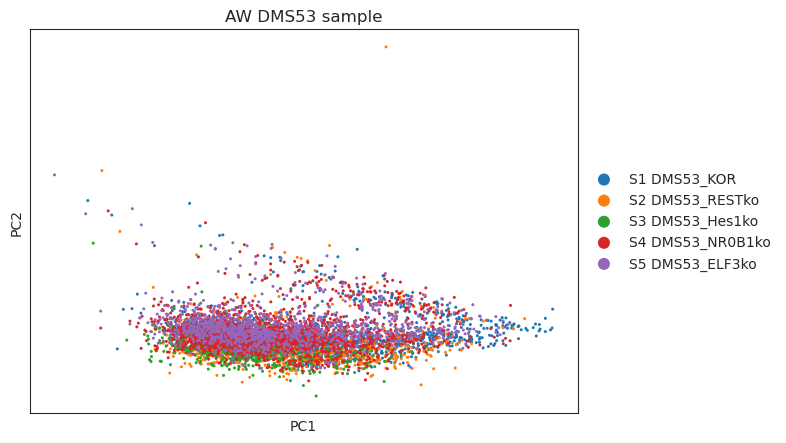

In [24]:
sc.pl.scatter(mt_rp_filter, basis='pca',color='AW_DMS53_sample')

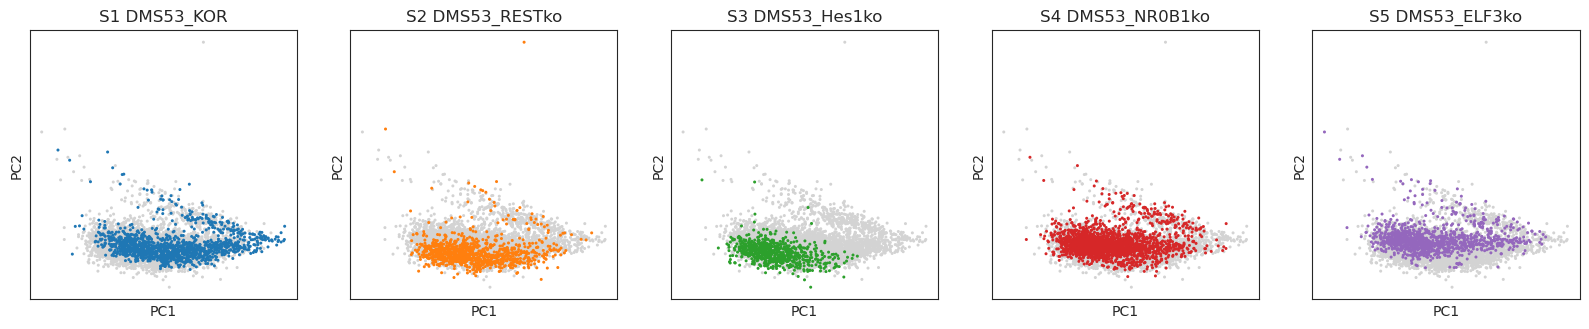

In [26]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,3.5))
ax1_dict = sc.pl.scatter(mt_rp_filter, basis='pca',color=['AW_DMS53_sample'], groups='S1 DMS53_KOR', ax=ax1, show=False, title=['S1 DMS53_KOR'], legend_loc='none')
ax2_dict = sc.pl.scatter(mt_rp_filter, basis='pca',color=['AW_DMS53_sample'], groups='S2 DMS53_RESTko', ax=ax2, show=False, title=['S2 DMS53_RESTko'], legend_loc='none')
ax3_dict = sc.pl.scatter(mt_rp_filter, basis='pca',color=['AW_DMS53_sample'], groups='S3 DMS53_Hes1ko', ax=ax3, show=False, title=['S3 DMS53_Hes1ko'], legend_loc='none')
ax4_dict = sc.pl.scatter(mt_rp_filter, basis='pca',color=['AW_DMS53_sample'], groups='S4 DMS53_NR0B1ko', ax=ax4, show=False, title=['S4 DMS53_NR0B1ko'], legend_loc='none')
ax5_dict = sc.pl.scatter(mt_rp_filter, basis='pca',color=['AW_DMS53_sample'], groups='S5 DMS53_ELF3ko', ax=ax5, show=False, title=['S5 DMS53_ELF3ko'], legend_loc='none')

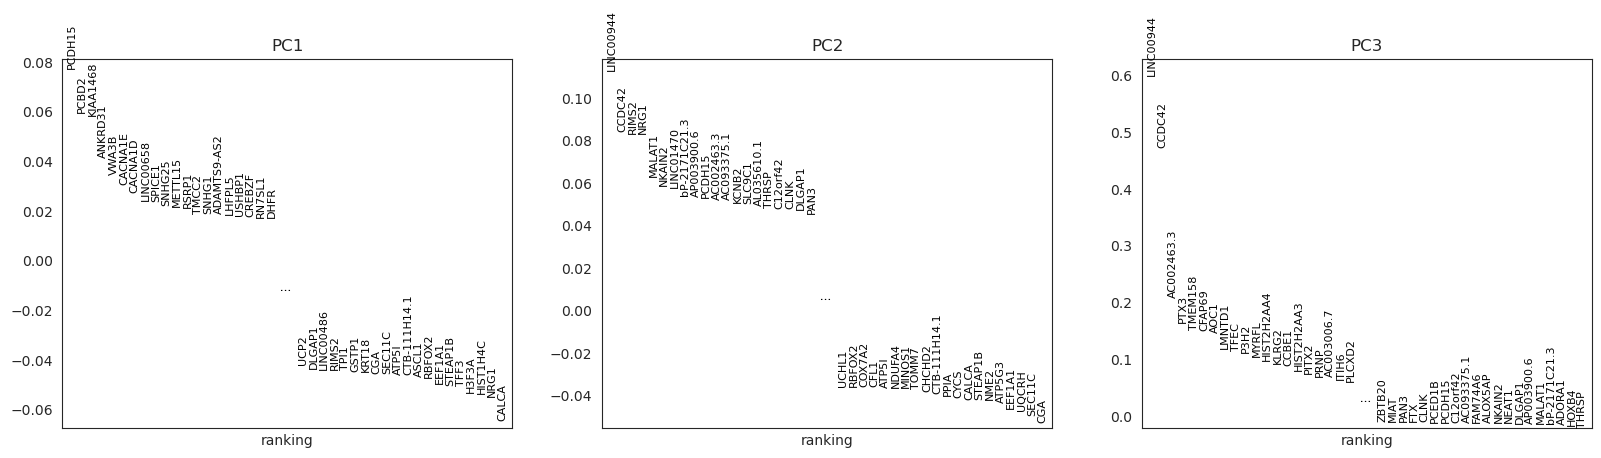

In [27]:
sc.pl.pca_loadings(mt_rp_filter, n_points=40)

In [28]:
mt_rp_filter.varm['PCs'].shape

(18470, 50)